# Plot the Env and some trees

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
import numpy as np
import glob
import datetime as dt
import time
import os,sys
import IPython
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from numpy.random import randint
from numpy import array
import heapq
from collections import namedtuple
import random

In [3]:
# in case you need to tweak your PYTHONPATH...
sys.path.append("../flatland")

In [4]:
import flatland.core.env
from flatland.utils import rail_env_generator
from flatland.core.env import RailEnv
import flatland.utils.rendertools as rt

### Generate Rail

In [5]:
random.seed(100)
oRail = rail_env_generator.generate_random_rail(10,10)
type(oRail), len(oRail)

(numpy.ndarray, 10)

In [6]:
oEnv = RailEnv(oRail, number_of_agents=2)
oEnv.reset()

{0: None, 1: None}

### Use new python file rendertools

In [7]:
oRT = rt.RenderTool(oEnv)

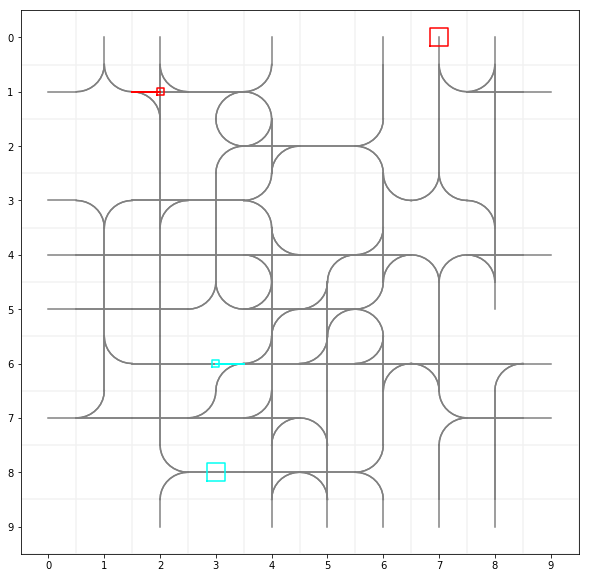

In [8]:
plt.figure(figsize=(10,10))
oRT.renderEnv()

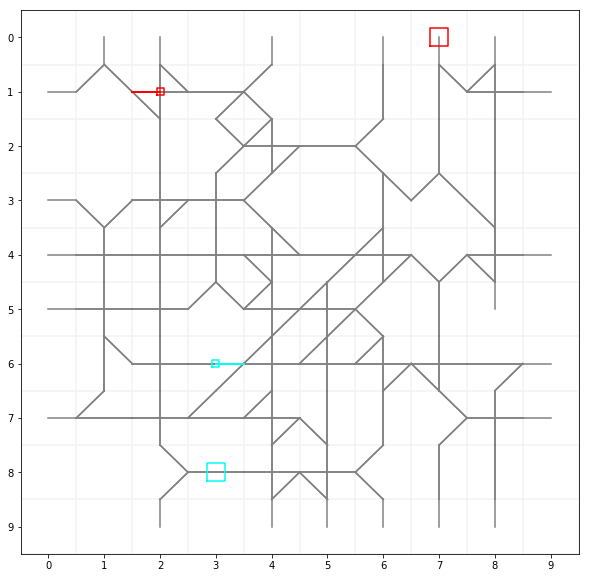

In [9]:
plt.figure(figsize=(10,10))
oRT.renderEnv(curves=False)

(1, 2) 3


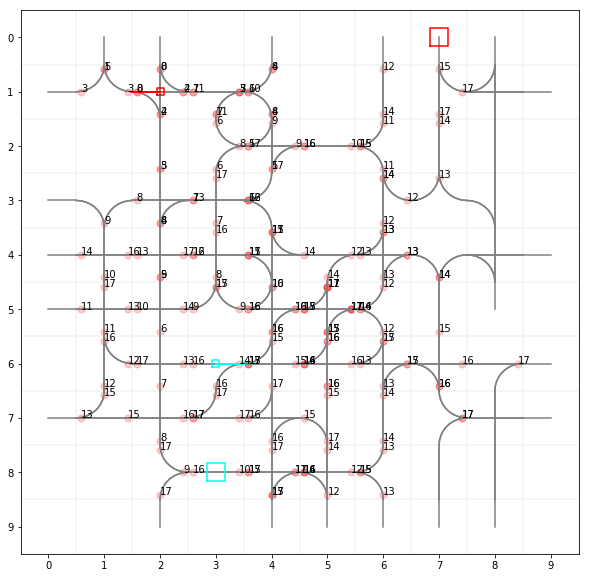

In [10]:
oFig = plt.figure(figsize=(10,10))
oRT.renderEnv()
lVisits = oRT.getTreeFromRail(oEnv.agents_position[0], oEnv.agents_direction[0], nDepth=17)
oRT.plotTreeOnRail(lVisits)

### Plot Tree / graph

In [11]:
rcPos = oEnv.agents_position[0]
oTrans = oEnv.rail[rcPos] 
oTrans

38505

(1, 2) 3


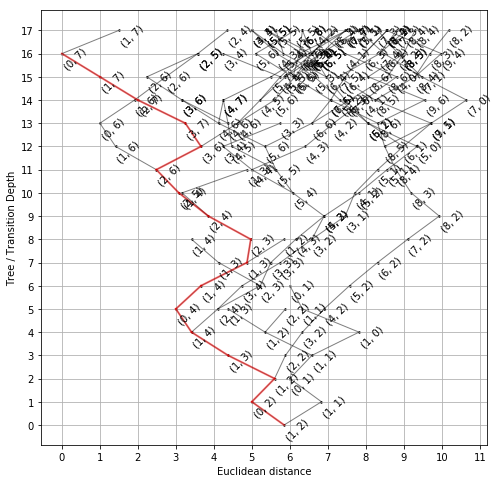

In [12]:
plt.figure(figsize=(8,8))
xyTarg = oRT.env.agents_target[0]
lVisits = oRT.getTreeFromRail(oEnv.agents_position[0], oEnv.agents_direction[0], nDepth=17)
visitDest = oRT.plotTree(lVisits, xyTarg)



### Plot the path from agent to destination on the rails

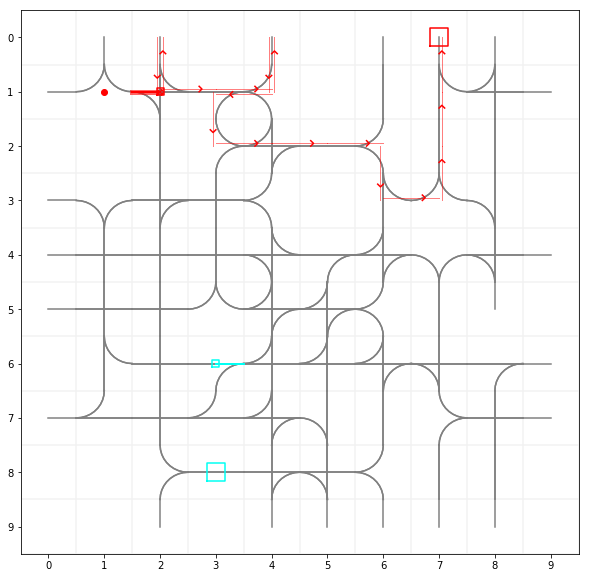

In [13]:
oFig = plt.figure(figsize=(10,10))
oRT.renderEnv()
oRT.plotPath(visitDest)

rcPos = oEnv.agents_position[0]
iDir = oEnv.agents_direction[0]
oRT.plotAgent(rcPos, iDir)


(1, 2) 3
(6, 3) 1


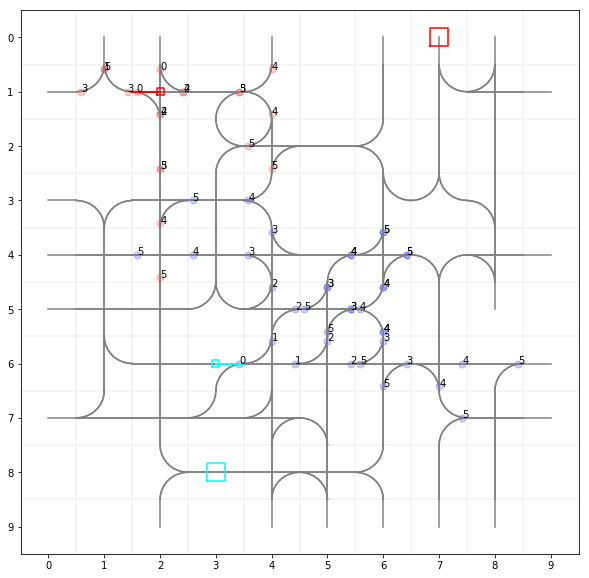

In [14]:
oFig = plt.figure(figsize=(10,10))
oRT.renderEnv()
for iAgent, color in zip([0, 1], list("rb")):
    rcPos = oEnv.agents_position[iAgent]
    iDir = oEnv.agents_direction[iAgent]
    lVisits = oRT.getTreeFromRail(rcPos, iDir, nDepth=5)
    oRT.plotTreeOnRail(lVisits, color=color)
    